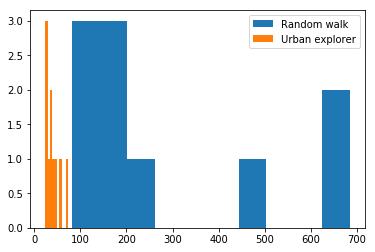

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import funcs as f
import osmnx as ox
import networkx as nx
from multiprocessing import Pool
from datetime import datetime
import time as time
from scipy import optimize
import pickle
%matplotlib inline

num_nodes = 20
G = nx.cycle_graph(num_nodes)

num_trials, m = 10, 1  # m = number of times each node has to be covered
Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
plt.hist(Ts_rw);plt.hist(Ts_ue);plt.legend(['Random walk','Urban explorer'])

#np.savetxt('data/covertimes_ring_urban_explorer.txt',Ts_ue)
#np.savetxt('data/covertimes_ring_random_walker.txt',Ts_rw)

In [35]:
def persisent_random_walk_ring(G, eps, num_trials=10):
    
    """
    Does a random walk until all nodes have been covered
    at least m times. Does this for num_trials times.
    """
    
    nodes = [node for node in G.nodes()]  #assume labeled 0,1,2,....n-1
    Ts = []
    trial = 0
    N = G.number_of_nodes()
    while trial < num_trials:
        trial += 1
        counts = np.zeros(len(nodes)) #count[i] count of node is
        time = 0
        current_position = np.random.choice(nodes)
        counts[current_position] += 1
        num_unvisited_nodes = np.sum(counts < m)
        dirn = 1
        while num_unvisited_nodes > 0:
            time += 1
            neighbours = G[current_position].keys()
            
            #Now toss coin -- this relies on the nodes being labeled sequentially
            temp = np.random.rand()
    
            #keep direction
            if temp <= (1.0 + eps) / 2.0:
                new_position = np.mod(current_position + dirn, N)
            else:
                dirn = -np.sign(dirn)
                new_position = np.mod(current_position + dirn, N)
                
            counts[new_position] += 1
            current_position = new_position
            num_unvisited_nodes = np.sum(counts < 1)
        Ts.append(time)
    return Ts

finished N = 10
finished N = 50
finished N = 100
finished N = 150
finished N = 200
finished N = 250
finished N = 300
finished N = 350
finished N = 400
finished N = 450
finished N = 500


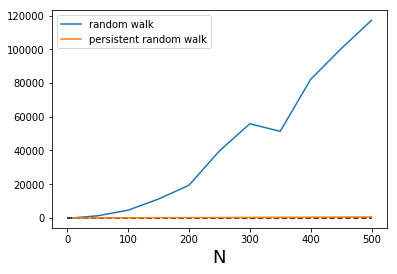

In [68]:
meanT_rw, meanT_prw, meanT_ue = [], [], []
Ns = [10] + range(50,501,50)
m, eps = 1, 0.999

for N in Ns:
    num_trials = 10
    G = nx.cycle_graph(N)
    Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
    Ts_prw = persisent_random_walk_ring(G,eps,num_trials=num_trials)
    meanT_rw.append(np.mean(Ts_rw))
    meanT_prw.append(np.mean(Ts_prw))
    print 'finished N = ' + str(N)
    
plt.plot(Ns,meanT_rw)
plt.plot(Ns,meanT_prw)
plt.xlabel('N',fontsize=18)
plt.legend(['random walk', 'persistent random walk'])

#np.savetxt('data/mean_covertime_ratio_ring.txt',meanTratios)
#np.savetxt('data/mean_covertime_ratio_ring_Ns.txt',Ns)

### Persistent random walk line

finished N = 5
finished N = 55
finished N = 105
finished N = 155
finished N = 205
finished N = 255
finished N = 305
finished N = 355
finished N = 405
finished N = 455


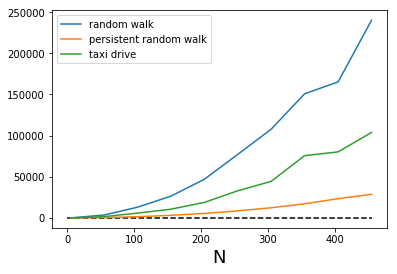

In [55]:
def persisent_random_walk_line(G, eps, num_trials=10):
    
    """
    Does a random walk until all nodes have been covered
    at least m times. Does this for num_trials times.
    """
    
    nodes = [node for node in G.nodes()]  #assume labeled 0,1,2,....n-1
    Ts = []
    trial = 0
    N = G.number_of_nodes()
    while trial < num_trials:
        trial += 1
        counts = np.zeros(len(nodes)) #count[i] count of node is
        time = 0
        current_position = np.random.choice(nodes)
        counts[current_position] += 1
        num_unvisited_nodes = np.sum(counts < m)
        dirn = 1
        while num_unvisited_nodes > 0:
            time += 1
            
            #Now toss coin -- this relies on the nodes being labeled sequentially
            temp = np.random.rand()
    
            #keep direction
            if temp <= (1.0 + eps) / 2.0:
                new_position = current_position + dirn
                
                #BSs
                if new_position == N:
                    new_position = N-2
                    dirn = -1
                    
                if new_position == -1:
                    new_position = 1
                    dirn = 1
                    
            #turn direction
            else:
                dirn = -np.sign(dirn)
                new_position = current_position + dirn
            counts[new_position] += 1
            current_position = new_position
            num_unvisited_nodes = np.sum(counts < 1)
        Ts.append(time)
    return Ts


meanT_rw, meanT_prw, meanT_ue = [], [], []
Ns = range(5,101,5)
Ns = range(5,501,50)
m, eps = 1, 0.8

for N in Ns:
    num_trials = 100
    G = nx.path_graph(N)
    Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
    Ts_prw = persisent_random_walk_line(G,eps,num_trials=num_trials)
    Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    meanT_rw.append(np.mean(Ts_rw))
    meanT_prw.append(np.mean(Ts_prw))
    meanT_ue.append(np.mean(Ts_ue))
    print 'finished N = ' + str(N)
    
plt.plot(Ns,meanT_rw)
plt.plot(Ns,meanT_prw)
plt.plot(Ns,meanT_ue)
plt.xlabel('N',fontsize=18)
plt.hlines(1,0,max(Ns),linestyles='dashed')
plt.legend(['random walk', 'persistent random walk', 'taxi drive'])

#np.savetxt('data/mean_covertime_ratio_ring.txt',meanTratios)
#np.savetxt('data/mean_covertime_ratio_ring_Ns.txt',Ns)

In [61]:
1.0 / (1.0 - 0.99)

99.99999999999991